In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("Farm_Weather_Data.csv")
df

,Date,MaxT,MinT,WindSpeed,Humidity,Precipitation
0,2006-01-08 00:00:00,29.5,21.8,1.6,70.2,0.0
1,2006-01-09 00:00:00,30.1,21.0,1.6,67.4,0.0
2,2006-01-10 00:00:00,29.9,21.1,1.7,65.2,0.0
3,2006-01-11 00:00:00,29.8,20.8,1.5,69.0,0.0
4,2006-01-12 00:00:00,29.6,20.5,2.1,69.5,0.0
...,...,...,...,...,...,...
6231,2023-01-30 00:00:00,34.0,19.0,4.0,63.0,0.0
6232,2023-01-31 00:00:00,37.0,19.0,2.9,57.5,0.0
6233,2023-02-01 00:00:00,34.0,20.0,2.3,55.0,0.0
6234,2023-02-02 00:00:00,38.0,19.0,2.4,54.0,0.0


In [29]:
 # Clean data
df = df[df['MaxT'] >= df['MinT']]   # Remove rows where MaxT is less than MinT
df['Date'] = df['Date'].str.split().str[0]   # Extract date part of Date column
#df = df[(df['Humidity'] >= 60) & (df['Precipitation'] > 0.5)]

# extra columns for analysis
df['Year'] = df['Date'].apply(lambda x: int(x.split('-')[0]))
df['Month'] = df['Date'].apply(lambda x: int(x.split('-')[1]))
df['Day'] = df['Date'].apply(lambda x: int(x.split('-')[2]))
df.drop(['Date'], axis=1, inplace=True)
df

,MaxT,MinT,WindSpeed,Humidity,Precipitation,Year,Month,Day
0,29.5,21.8,1.6,70.2,0.0,2006,1,8
1,30.1,21.0,1.6,67.4,0.0,2006,1,9
2,29.9,21.1,1.7,65.2,0.0,2006,1,10
3,29.8,20.8,1.5,69.0,0.0,2006,1,11
4,29.6,20.5,2.1,69.5,0.0,2006,1,12
...,...,...,...,...,...,...,...,...
6231,34.0,19.0,4.0,63.0,0.0,2023,1,30
6232,37.0,19.0,2.9,57.5,0.0,2023,1,31
6233,34.0,20.0,2.3,55.0,0.0,2023,2,1
6234,38.0,19.0,2.4,54.0,0.0,2023,2,2


In [30]:
column_order = ['Year', 'Month', 'Day'] + [col for col in df.columns if col not in ['Year', 'Month', 'Day']]

# Reindex the DataFrame using the new column order
df = df[column_order]
df

,Year,Month,Day,MaxT,MinT,WindSpeed,Humidity,Precipitation
0,2006,1,8,29.5,21.8,1.6,70.2,0.0
1,2006,1,9,30.1,21.0,1.6,67.4,0.0
2,2006,1,10,29.9,21.1,1.7,65.2,0.0
3,2006,1,11,29.8,20.8,1.5,69.0,0.0
4,2006,1,12,29.6,20.5,2.1,69.5,0.0
...,...,...,...,...,...,...,...,...
6231,2023,1,30,34.0,19.0,4.0,63.0,0.0
6232,2023,1,31,37.0,19.0,2.9,57.5,0.0
6233,2023,2,1,34.0,20.0,2.3,55.0,0.0
6234,2023,2,2,38.0,19.0,2.4,54.0,0.0


In [31]:
df.isna().sum()

Year             0
Month            0
Day              0
MaxT             0
MinT             0
WindSpeed        0
Humidity         0
Precipitation    0
dtype: int64

In [32]:
df = df[df['Year'] < 2023]
df

,Year,Month,Day,MaxT,MinT,WindSpeed,Humidity,Precipitation
0,2006,1,8,29.5,21.8,1.6,70.2,0.0
1,2006,1,9,30.1,21.0,1.6,67.4,0.0
2,2006,1,10,29.9,21.1,1.7,65.2,0.0
3,2006,1,11,29.8,20.8,1.5,69.0,0.0
4,2006,1,12,29.6,20.5,2.1,69.5,0.0
...,...,...,...,...,...,...,...,...
6197,2022,12,27,34.0,21.0,2.0,72.0,0.0
6198,2022,12,28,35.0,21.0,1.6,68.0,0.0
6199,2022,12,29,35.0,22.0,1.8,67.0,0.0
6200,2022,12,30,35.0,21.0,1.2,64.5,0.0


count    6202.000000
mean        3.445292
std         8.288860
min         0.000000
25%         0.000000
50%         0.000000
75%         2.600000
max       128.300000
Name: Precipitation, dtype: float64


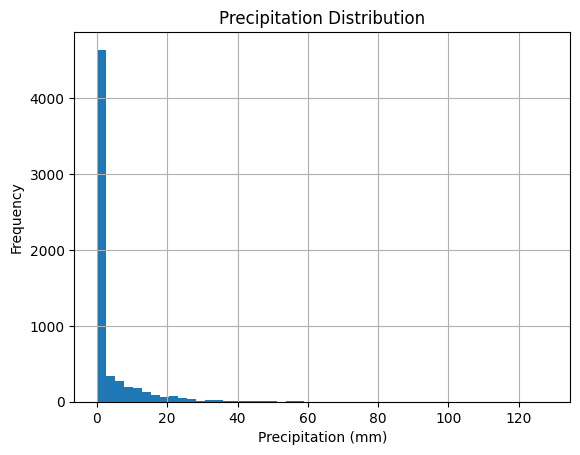

In [33]:
# Get a statistical summary
print(df['Precipitation'].describe())

# Plot the distribution
import matplotlib.pyplot as plt
df['Precipitation'].hist(bins=50)
plt.title('Precipitation Distribution')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.show()

# Creating different rain categories
0 = No rain <br>
1 = Light rain <br>
2 = Moderate rain <br>
3 = Heavy rain <br>
4 = Extreme rain <br>

In [34]:
def classify_rainfall(amount):
    if amount == 0:
        return 0  # No rain
    elif amount < 2.5:
        return 1  # Light rain
    elif amount <= 7.6:  # Adjusted to include up to 7.6 as moderate
        return 2  # Moderate rain
    elif amount <= 50:  # Adjusted to include up to 50 as heavy
        return 3  # Heavy rain
    else:
        return 4  # Extreme rain

# Apply the classification function to the 'Precipitation' column
df.loc[:, 'Rain'] = df['Precipitation'].apply(classify_rainfall)
df

C:\Users\grine\AppData\Local\Temp\ipykernel_14488\1198773640.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Rain'] = df['Precipitation'].apply(classify_rainfall)


,Year,Month,Day,MaxT,MinT,WindSpeed,Humidity,Precipitation,Rain
0,2006,1,8,29.5,21.8,1.6,70.2,0.0,0
1,2006,1,9,30.1,21.0,1.6,67.4,0.0,0
2,2006,1,10,29.9,21.1,1.7,65.2,0.0,0
3,2006,1,11,29.8,20.8,1.5,69.0,0.0,0
4,2006,1,12,29.6,20.5,2.1,69.5,0.0,0
...,...,...,...,...,...,...,...,...,...
6197,2022,12,27,34.0,21.0,2.0,72.0,0.0,0
6198,2022,12,28,35.0,21.0,1.6,68.0,0.0,0
6199,2022,12,29,35.0,22.0,1.8,67.0,0.0,0
6200,2022,12,30,35.0,21.0,1.2,64.5,0.0,0


## No Rain

In [35]:
df[df['Rain'] == 0]

,Year,Month,Day,MaxT,MinT,WindSpeed,Humidity,Precipitation,Rain
0,2006,1,8,29.5,21.8,1.6,70.2,0.0,0
1,2006,1,9,30.1,21.0,1.6,67.4,0.0,0
2,2006,1,10,29.9,21.1,1.7,65.2,0.0,0
3,2006,1,11,29.8,20.8,1.5,69.0,0.0,0
4,2006,1,12,29.6,20.5,2.1,69.5,0.0,0
...,...,...,...,...,...,...,...,...,...
6197,2022,12,27,34.0,21.0,2.0,72.0,0.0,0
6198,2022,12,28,35.0,21.0,1.6,68.0,0.0,0
6199,2022,12,29,35.0,22.0,1.8,67.0,0.0,0
6200,2022,12,30,35.0,21.0,1.2,64.5,0.0,0


## Light Rain

In [36]:
df[df['Rain'] == 1]

,Year,Month,Day,MaxT,MinT,WindSpeed,Humidity,Precipitation,Rain
454,2007,4,7,34.5,25.5,2.6,58.0,2.1,1
479,2007,5,2,36.6,27.9,2.3,57.4,2.2,1
480,2007,5,3,35.4,26.0,2.5,61.9,2.2,1
502,2007,5,25,38.8,28.8,3.3,51.4,2.3,1
664,2007,11,3,31.9,24.5,1.4,79.4,1.6,1
...,...,...,...,...,...,...,...,...,...
6143,2022,11,3,30.0,24.0,1.9,80.0,1.1,1
6144,2022,11,4,31.0,23.0,2.6,77.0,1.7,1
6165,2022,11,25,31.0,23.0,2.2,75.0,1.1,1
6182,2022,12,12,30.0,22.0,3.5,77.0,0.2,1


## Moderate Rain

In [37]:
df[df['Rain'] == 2]

,Year,Month,Day,MaxT,MinT,WindSpeed,Humidity,Precipitation,Rain
54,2006,3,3,32.1,24.3,2.8,71.3,4.8,2
56,2006,3,5,32.9,24.6,2.3,69.6,4.8,2
113,2006,5,1,37.4,28.1,3.2,59.9,4.7,2
128,2006,5,16,35.4,29.0,3.1,50.0,7.3,2
131,2006,5,19,37.4,27.0,3.3,52.1,4.9,2
...,...,...,...,...,...,...,...,...,...
6119,2022,10,10,27.0,23.0,4.1,91.0,3.3,2
6120,2022,10,11,30.0,24.0,2.7,86.0,2.8,2
6127,2022,10,18,31.0,24.0,1.3,82.0,2.6,2
6130,2022,10,21,30.0,23.0,3.5,82.5,2.6,2


## Heavy Rain

In [38]:
df[df['Rain'] == 3]

,Year,Month,Day,MaxT,MinT,WindSpeed,Humidity,Precipitation,Rain
98,2006,4,16,34.5,26.9,3.0,76.0,9.8,3
99,2006,4,17,28.3,22.9,2.4,72.4,9.8,3
125,2006,5,13,37.8,29.6,3.3,61.5,8.4,3
129,2006,5,17,35.8,25.4,3.3,54.8,14.7,3
132,2006,5,20,31.3,25.4,3.9,56.5,14.7,3
...,...,...,...,...,...,...,...,...,...
6062,2022,8,14,24.0,24.0,7.9,94.0,26.8,3
6088,2022,9,9,26.0,24.0,7.7,93.0,18.7,3
6089,2022,9,10,28.0,24.0,4.3,91.5,11.1,3
6107,2022,9,28,33.0,25.0,1.5,79.0,9.2,3


## Extreme Rain

In [39]:
df[df['Rain'] == 4]

,Year,Month,Day,MaxT,MinT,WindSpeed,Humidity,Precipitation,Rain
206,2006,8,2,27.4,25.7,4.6,69.1,51.2,4
207,2006,8,3,25.7,24.5,4.7,70.6,51.2,4
208,2006,8,4,27.0,24.4,5.1,69.0,51.2,4
294,2006,10,29,24.9,23.4,2.2,80.6,57.4,4
295,2006,10,30,26.2,23.5,2.2,81.8,85.1,4
1756,2010,10,30,26.3,23.6,2.6,88.9,50.2,4
2426,2012,8,30,29.2,24.9,3.4,75.3,54.7,4
2740,2013,7,10,29.3,25.6,5.0,77.8,50.3,4
2844,2013,10,22,26.4,24.9,2.8,91.1,66.2,4
2848,2013,10,26,28.8,25.3,3.1,87.9,86.2,4


<Axes: >

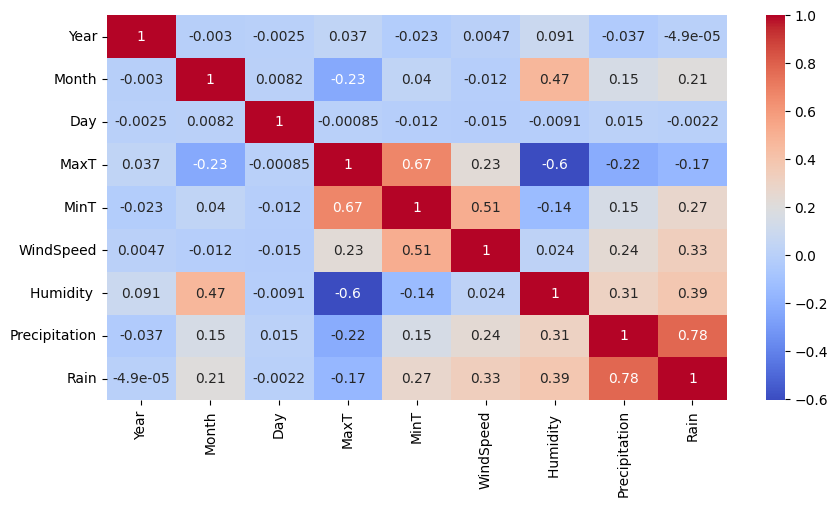

In [40]:
# A correlation heat map for each pair of explanatory variables.
plt.figure(figsize=(10, 5))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Train Test Split

In [41]:
from sklearn.model_selection import train_test_split

# Assume 'df' is your DataFrame and 'Rain' is the target variable
X = df.drop(['Precipitation', 'Rain'], axis=1)  # Drop the target and original Precipitation column
y = df['Rain']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model for multiclass classification
# 'multinomial' specifies that you want softmax regression
# 'lbfgs' solver supports multinomial logistic regression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=42)

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42)

In [44]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the testing set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed classification report
report = classification_report(y_test, y_pred, target_names=['No Rain', 'Light Rain', 'Moderate Rain', 'Heavy Rain', 'Extreme Rain'], zero_division=0)
print(report)

Accuracy: 0.750201450443191
               precision    recall  f1-score   support

      No Rain       0.80      0.94      0.86       881
   Light Rain       0.55      0.32      0.40        73
Moderate Rain       0.33      0.01      0.02       113
   Heavy Rain       0.49      0.46      0.47       170
 Extreme Rain       0.00      0.00      0.00         4

     accuracy                           0.75      1241
    macro avg       0.43      0.34      0.35      1241
 weighted avg       0.70      0.75      0.70      1241



## Random Forrest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [47]:
# Predict on the test data
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print a classification report to see precision, recall, and F1-score for each class
print(classification_report(y_test, y_pred, target_names=['No Rain', 'Light Rain', 'Moderate Rain', 'Heavy Rain', 'Extreme Rain']))

Accuracy: 0.774375503626108
               precision    recall  f1-score   support

      No Rain       0.84      0.95      0.89       881
   Light Rain       0.52      0.36      0.42        73
Moderate Rain       0.25      0.09      0.13       113
   Heavy Rain       0.58      0.53      0.55       170
 Extreme Rain       0.00      0.00      0.00         4

     accuracy                           0.77      1241
    macro avg       0.44      0.38      0.40      1241
 weighted avg       0.73      0.77      0.74      1241



## Tuning Hyperparameters for Random Forrest

In [48]:
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameters grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Depth of trees
    'min_samples_leaf': [1, 2, 4],  # Min number of samples required at each leaf node
    'class_weight': ['balanced', None]  # Weights for handling imbalanced classes
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1_macro', verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters found
print("Best parameters:", grid_search.best_params_)

# Use the best model to predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy: {accuracy}")
report = classification_report(y_test, y_pred, target_names=['No Rain', 'Light Rain', 'Moderate Rain', 'Heavy Rain', 'Extreme Rain'])
print(report)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


KeyboardInterrupt: 

**Accuracy dropped by 6% but the f1-score increased a decent amount. That is the trade-off we will have to take since we were getting horrible f1-score for moderate and extreme rain earlier.**

## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gbm.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred_gbm = gbm.predict(X_test_scaled)

# Calculate accuracy
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print(f"Accuracy with Gradient Boosting Classifier: {accuracy_gbm}")

# Detailed classification report
report_gbm = classification_report(y_test, y_pred_gbm, target_names=['No Rain', 'Light Rain', 'Moderate Rain', 'Heavy Rain', 'Extreme Rain'])
print(report_gbm)

Accuracy with Gradient Boosting Classifier: 0.7816277195809831
               precision    recall  f1-score   support

      No Rain       0.84      0.95      0.89       881
   Light Rain       0.50      0.55      0.52        73
Moderate Rain       0.39      0.06      0.11       113
   Heavy Rain       0.60      0.51      0.55       170
 Extreme Rain       0.17      0.25      0.20         4

     accuracy                           0.78      1241
    macro avg       0.50      0.46      0.45      1241
 weighted avg       0.74      0.78      0.75      1241



## XGBoost and CatBoost

In [ ]:
from xgboost import XGBClassifier

# Initialize the XGBClassifier
xgb_model = XGBClassifier(objective='multi:softmax', num_class=5, use_label_encoder=False, eval_metric='mlogloss')

# Fit the model
xgb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy with Gradient Boosting Classifier: {accuracy_xgb}")

# Evaluate
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb, target_names=['No Rain', 'Light Rain', 'Moderate Rain', 'Heavy Rain', 'Extreme Rain']))

Accuracy with Gradient Boosting Classifier: 0.7767929089443997
XGBoost Performance:
               precision    recall  f1-score   support

      No Rain       0.86      0.93      0.89       881
   Light Rain       0.50      0.47      0.48        73
Moderate Rain       0.32      0.17      0.22       113
   Heavy Rain       0.59      0.55      0.57       170
 Extreme Rain       0.00      0.00      0.00         4

     accuracy                           0.78      1241
    macro avg       0.45      0.42      0.43      1241
 weighted avg       0.75      0.78      0.76      1241



In [ ]:
from catboost import CatBoostClassifier

# Initialize the CatBoostClassifier
cat_model = CatBoostClassifier(verbose=0)  # 'verbose=0' to silence the output

# Fit the model
cat_model.fit(X_train_scaled, y_train)

# Predict
y_pred_cat = cat_model.predict(X_test_scaled)

# Calculate accuracy
accuracy_cat = accuracy_score(y_test, y_pred_cat)
print(f"Accuracy with Gradient Boosting Classifier: {accuracy_cat}")

# Evaluate
print("CatBoost Performance:")
print(classification_report(y_test, y_pred_cat, target_names=['No Rain', 'Light Rain', 'Moderate Rain', 'Heavy Rain', 'Extreme Rain']))

Accuracy with Gradient Boosting Classifier: 0.7767929089443997
CatBoost Performance:
               precision    recall  f1-score   support

      No Rain       0.85      0.94      0.89       881
   Light Rain       0.53      0.42      0.47        73
Moderate Rain       0.26      0.14      0.18       113
   Heavy Rain       0.59      0.54      0.56       170
 Extreme Rain       0.50      0.25      0.33         4

     accuracy                           0.78      1241
    macro avg       0.55      0.46      0.49      1241
 weighted avg       0.74      0.78      0.76      1241

